## This notebook may be used to generate the lower left panel in Fig 5 (Fig.5C).

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

<IPython.core.display.Javascript object>


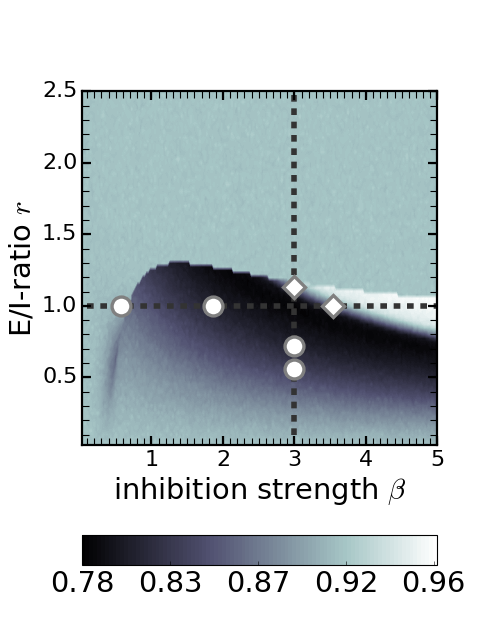

In [9]:
# define grid -> grid for contourplot
r_data = []
beta_data = []
Ep_data = []

with open('PenaltyData_PooledInh_v7p5_tau4_VeryFineRes_New2018_rs.txt', 'r') as infile:
    infile.readline
    for line in infile:
        if not line.startswith('#'):
            r_data.append(float(line.split()[0]))
            beta_data.append(float(line.split()[1]))
            Ep_data.append(float(line.split()[2]))

xi_val = np.linspace(min(beta_data),max(beta_data),200) 
yi_val = np.linspace(min(r_data),max(r_data),100) 

# grid the data.
zi_val =  griddata( (beta_data, r_data), Ep_data, 
                   (xi_val[None,:], yi_val[:,None]), method='cubic' ) 

Pen_init = 2*7.5**2
fig = plt.figure(figsize=(6,8))
#ax = plt.axes()
ax = fig.add_subplot(111)
#CS = plt.contourf(xi_val,yi_val,zi_val/np.max(zi_val),50,cmap=plt.cm.bone)
CS = ax.contourf(xi_val,yi_val,zi_val/Pen_init,100,cmap=plt.cm.bone)

cbar = fig.colorbar(CS, orientation='horizontal',aspect=12)
cbar.ax.tick_params(labelsize=26) 
#cbar.set_label('expected penalty', fontsize=28, labelpad=-70)

#lowlim = np.min(zi_val)/np.max(zi_val);
lowlim = float(np.min(zi_val)/Pen_init)
uplim = float(np.max(zi_val)/Pen_init)
mid1 = 1/4*(uplim-lowlim)+lowlim; 
mid2 = 1/2*(uplim-lowlim)+lowlim; 
mid3 =3/4*(uplim-lowlim)+lowlim;
cbar.set_ticks([lowlim,mid1,mid2,mid3,uplim])
cbar.set_ticklabels([round(lowlim, 2), round(mid1, 2), round(mid2, 2), round(mid3, 2), round(uplim, 2)])
#plt.title(r'expected penalty',fontsize=22)
plt.xlabel(r'inhibition strength $\beta$', fontsize=26)
plt.ylabel(r'E/I-ratio $r$', fontsize=26)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=20)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

plt.plot([3,3],[0.1,2.5],c='0.2',lw=5, ls='--')
plt.plot([0.1,5],[1,1],c='0.2',lw=5, ls='--')
#plt.plot([3,3], [1,2], marker='o', mfc='0.5', markersize=16, ls='None', markeredgecolor='1',mew=2)
plt.plot([0.575,1.863], [1,1], marker='o',ls='None', mfc='1', markersize=17, 
         markeredgecolor='0.5',mew=3)
#(3.361,1)
plt.plot([3,3], [0.561,0.719], marker='o',ls='None', mfc='1', markersize=17, 
         markeredgecolor='0.5',mew=3)
#(3,1.08)

plt.plot([3,3.54], [1.13,1], marker='D',ls='None', mfc='1', markersize=14, 
         markeredgecolor='0.5',mew=3)


#plt.tick_params(labelsize=14)
#plt.show()
ax.set_aspect(2)
plt.tight_layout();

In [11]:
#fig.savefig("Fig5BottomLeft.png")
#fig.savefig("Fig5BottomLeft.pdf")